In [152]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [78]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


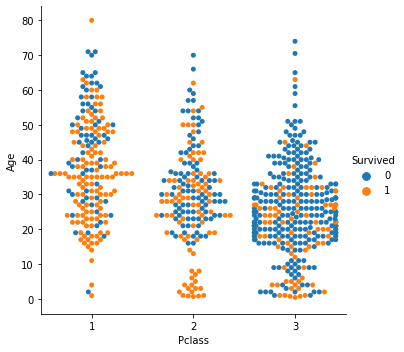

In [79]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="Pclass", y="Age", hue="Survived", kind="swarm", data=data);

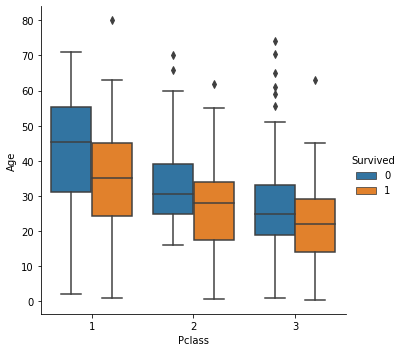

In [80]:
sns.catplot(x="Pclass", y="Age", kind="box", hue="Survived",data=data);

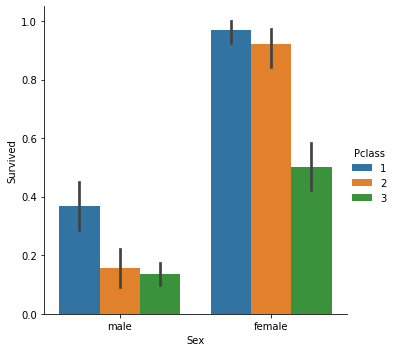

In [81]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data);

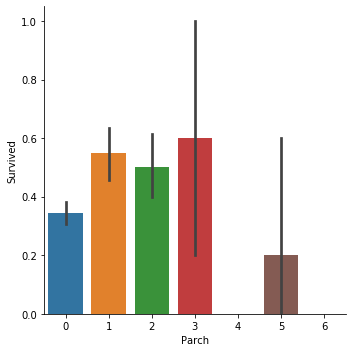

In [82]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=data);

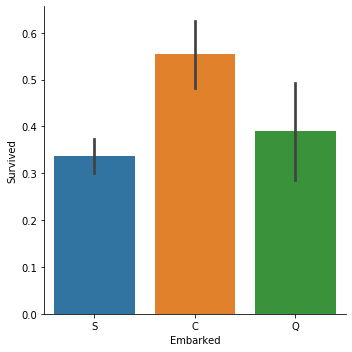

In [83]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=data);

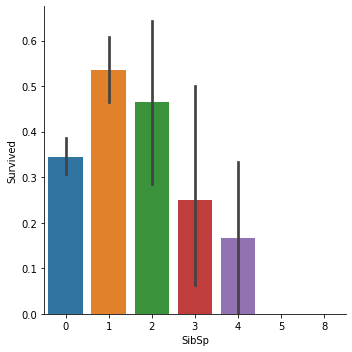

In [84]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=data);

In [85]:
pd.isna(data.Cabin[0])

True

In [86]:
#[i[0] for i in data.Cabin.dropna()]
data['deck'] = data['Cabin'].apply(lambda x: 'NA' if pd.isna(x) else x[0])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NA


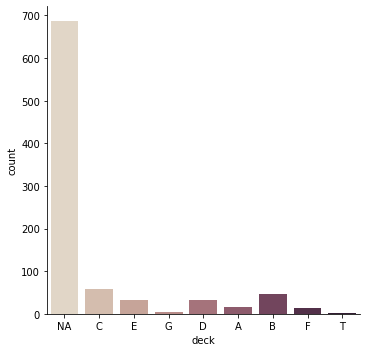

In [87]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=data)

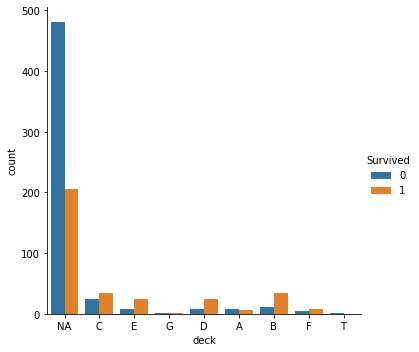

In [88]:
sns.catplot(x="deck", kind="count", hue="Survived", data=data)

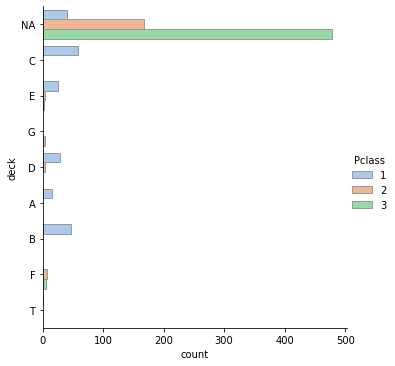

In [89]:
sns.catplot(y="deck", hue="Pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

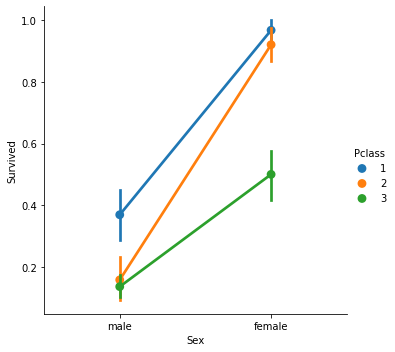

In [90]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=data);

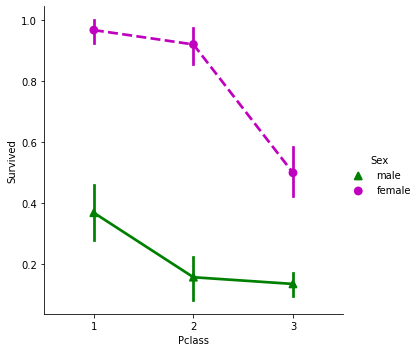

In [91]:
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=data);

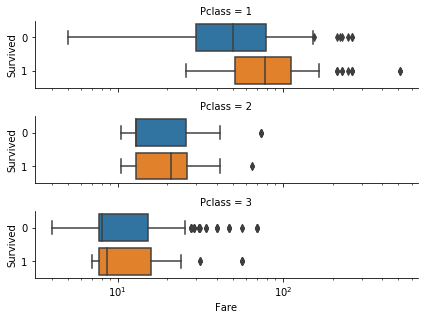

In [92]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("Fare > 0"))
g.set(xscale="log");

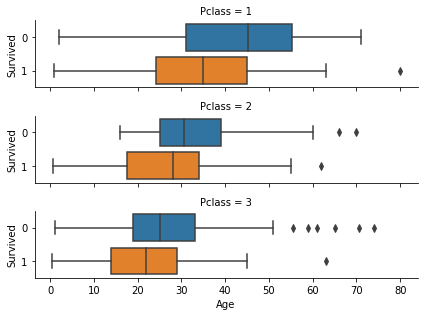

In [93]:
g = sns.catplot(x="Age", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("Age > 0"))
#g.set(xscale="log");

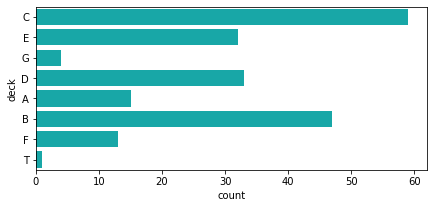

In [94]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=data[data.deck!='NA'], color="c");

In [95]:
data['TktPre'] = data.Ticket.apply(lambda x: x.split(' ')[0] if len(x.split())>1 else 0)
data['TktNum'] = data.Ticket.apply(lambda x: x.split(' ')[-1] if len(x.split())>1 else x)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,TktPre,TktNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NA,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NA,0,373450


In [96]:
data['TktNum'].loc[data.TktNum=="LINE"] = 111

/home/vasylcf/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [125]:
data.TktPre.unique()

array(['A/5', 'PC', 'STON/O2.', 0, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [131]:
data['TktPre'] = data['TktPre'].apply(lambda x: re.sub('[^a-zA-Z0-9 ]','',str(x)))

In [133]:
data.TktPre.unique()

array(['A5', 'PC', 'STONO2', '0', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

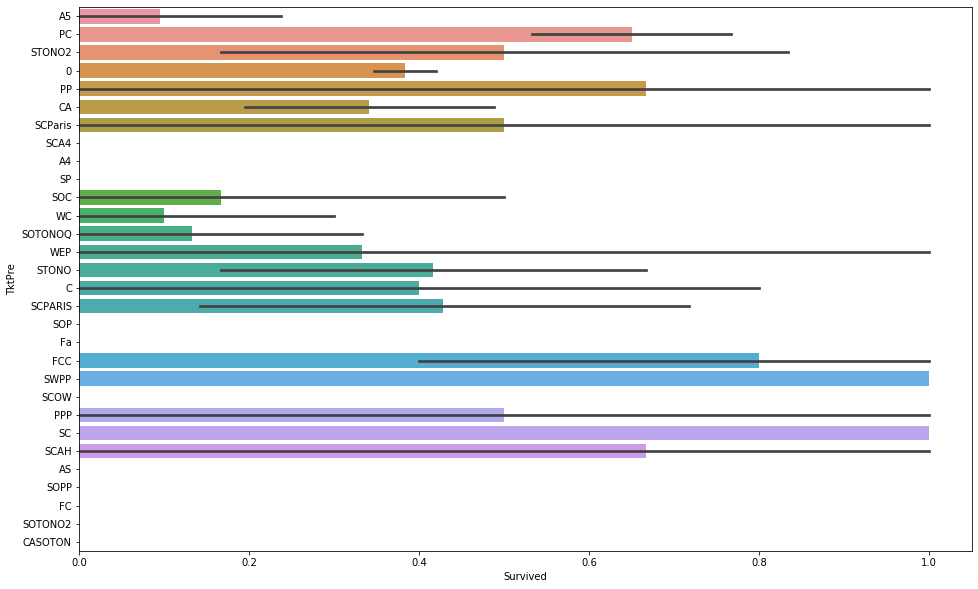

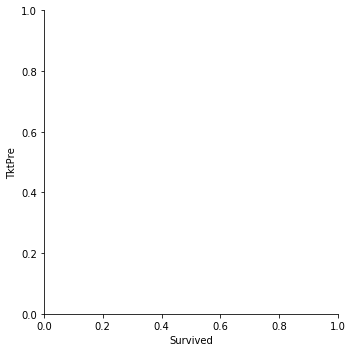

In [134]:
f, ax = plt.subplots(figsize=(16, 10))
sns.catplot(y='TktPre',x='Survived',kind='bar',  ax=ax, data=data)
plt.show()

In [65]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'deck', 'TktPre',
       'TktNum', 'TktCat'],
      dtype='object')

In [135]:
#build model
y = data['Survived']
X = data[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked', 'deck', 'TktPre']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,deck,TktPre
0,3,male,22.0,1,0,7.2500,S,NA,A5
1,1,female,38.0,1,0,71.2833,C,C,PC
2,3,female,26.0,0,0,7.9250,S,NA,STONO2
3,1,female,35.0,1,0,53.1000,S,C,0
4,3,male,35.0,0,0,8.0500,S,NA,0


In [138]:
cat_cols = pd.get_dummies(data[[ 'Sex', 'Embarked', 'deck', 'TktPre']])
cat_cols.shape

(891, 44)

In [146]:
X['Age']=(X['Age']-X['Age'].mean())/X['Age'].std()
X['Fare']=(X['Fare']-X['Fare'].mean())/X['Fare'].std()

/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,deck,TktPre
0,3,male,-0.530005,1,0,-0.502163,S,NA,A5
1,1,female,0.571430,1,0,0.786404,C,C,PC
2,3,female,-0.254646,0,0,-0.488580,S,NA,STONO2
3,1,female,0.364911,1,0,0.420494,S,C,0
4,3,male,0.364911,0,0,-0.486064,S,NA,0


In [151]:
F = pd.concat((X[['Pclass','Age','Fare','SibSp','Parch']],cat_cols),axis=1)
F.shape

(891, 49)

In [162]:
F['Age']=F['Age'].fillna(F['Age'].mean())

In [174]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(F,y,test_size=0.2, random_state=10)

In [175]:
clf = LogisticRegression()

In [176]:
clf.fit(X_train, y_train)

/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
model_selection.cross_val_score(clf, X_train, y_train, cv=3)

/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.82352941, 0.74261603, 0.8185654 ])

In [178]:
model_selection.cross_val_score(clf, X_test, y_test, cv=3)

/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.8       , 0.83333333, 0.79661017])

In [203]:
test = pd.read_csv('data/test.csv')

In [201]:
test.shape

(418, 11)

In [204]:
test['TktPre'] = test.Ticket.apply(lambda x: x.split(' ')[0] if len(x.split())>1 else 0)
test['TktNum'] = test.Ticket.apply(lambda x: x.split(' ')[-1] if len(x.split())>1 else x)

test['TktNum'].loc[test.TktNum=="LINE"] = 111
test['TktPre'] = test['TktPre'].apply(lambda x: re.sub('[^a-zA-Z0-9 ]','',str(x)))
test['deck'] = test['Cabin'].apply(lambda x: 'NA' if pd.isna(x) else x[0])

XT = test[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked', 'deck', 'TktPre']]
XT.shape

(418, 9)

In [205]:
XT.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
deck         0
TktPre       0
dtype: int64

In [206]:
XT['Age'] = XT['Age'].fillna(XT['Age'].mean())
XT['Fare'] = XT['Fare'].fillna(XT['Fare'].mean())

/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
cat_cols_test = pd.get_dummies(XT[[ 'Sex', 'Embarked', 'deck', 'TktPre']])
cat_cols_test.shape

(418, 41)

In [208]:
XT['Age']=(XT['Age']-XT['Age'].mean())/XT['Age'].std()
XT['Fare']=(XT['Fare']-XT['Fare'].mean())/XT['Fare'].std()

/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vasylcf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [209]:
FT = pd.concat((XT[['Pclass','Age','Fare','SibSp','Parch']],cat_cols_test),axis=1)
FT.shape

(418, 46)

In [210]:
preditions = clf.predict(FT)

ValueError: X has 46 features per sample; expecting 49

In [211]:
FT.columns

Index(['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_NA', 'TktPre_0',
       'TktPre_A', 'TktPre_A4', 'TktPre_A5', 'TktPre_AQ3', 'TktPre_AQ4',
       'TktPre_C', 'TktPre_CA', 'TktPre_FC', 'TktPre_FCC', 'TktPre_LP',
       'TktPre_PC', 'TktPre_PP', 'TktPre_SC', 'TktPre_SCA3', 'TktPre_SCA4',
       'TktPre_SCAH', 'TktPre_SCPARIS', 'TktPre_SCParis', 'TktPre_SOC',
       'TktPre_SOPP', 'TktPre_SOTONO2', 'TktPre_SOTONOQ', 'TktPre_STONO',
       'TktPre_STONO2', 'TktPre_STONOQ', 'TktPre_WC', 'TktPre_WEP'],
      dtype='object')

In [218]:
(set(F.columns) ^ set(FT.columns))

{'TktPre_A',
 'TktPre_AQ3',
 'TktPre_AQ4',
 'TktPre_AS',
 'TktPre_CASOTON',
 'TktPre_Fa',
 'TktPre_LP',
 'TktPre_PPP',
 'TktPre_SCA3',
 'TktPre_SCOW',
 'TktPre_SOP',
 'TktPre_SP',
 'TktPre_STONOQ',
 'TktPre_SWPP',
 'deck_T'}

In [190]:
sample = pd.read_csv('data/gender_submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [193]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TktPre,TktNum
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,240276
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,315154
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3101298


In [192]:
submission = pd.DataFrame(columns=['PassengerId','Survived'])

In [195]:
test.shape

(418, 13)

In [196]:
preditions.shape

(891,)

In [194]:
submission.PassengerId = test.PassengerId
submission.Survived = preditions

ValueError: Length of values does not match length of index

In [168]:
cat_cols_2 = pd.get_dummies(data[[ 'Sex', 'Embarked', 'deck']])
cat_cols_2.shape

(891, 14)

In [169]:
F_2 = pd.concat((X[['Pclass','Age','Fare','SibSp','Parch']],cat_cols_2),axis=1)
F_2.shape

(891, 19)

In [173]:
F_2['Age']=F_2['Age'].fillna(F_2['Age'].mean())
X_train, X_test, y_train, y_test = model_selection.train_test_split(F_2,y,test_size=0.2, random_state=10)
clf_2 = LogisticRegression()
clf_2.fit(X_train, y_train)
val_train = model_selection.cross_val_score(clf_2, X_train, y_train, cv=3)
val_test = model_selection.cross_val_score(clf_2, X_test, y_test, cv=3)
print(f'train validation: {val_train}')
print(f'test validation: {val_test}')

train validation: [0.81932773 0.73839662 0.82278481]
test validation: [0.8        0.85       0.79661017]


/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '